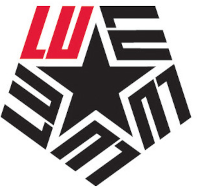


<h1 line-height=0px> <center> <font color='blue'>  CVEN 2320 Differential Equation for Civil Engineers </center></font></h1>

<h3 line-height:0> <center> <font color='teal'> Venki Uddameri </font> </center> </h3>
<p line-height: 0;> <center><font color='green'>Department of Civil and Environmental Engineering </font></center></p> 
<hr>

<h4> Problem Statement </h4>

A land-developer proposes to construct a man-made lake with a surface area of 100 Ha and an average depth of 10 m.  The average inflow into this lake is 1000 m$^3$/d and the Biochemical Oxygen Demand (BOD) in the incoming water is approximately 15 g/m$^3$.  A new housing sub-division with a of population 30000 residents is proposed to be build around this lake front.  The developer seeks to discharge the treated wastewater from the subdivision into this lake.  The per-capita water use of the sub-division is projected to be about 120 gpcd.  The treated effluent has a BOD of 30 g/m$^3$.  The half-life of BOD in the lake is estimated to be 30 days (based on similar lakes in the area).  The current concentration of BOD in the lake is around 10 g/m$^3$ (i.e., prior to the construction of the sub-division). What is the BOD of the water flowing out of the lake.  Assume total water inflow rate = total water outflow lake.  **Regulatory agency require the water leaving the lake to have a BOD no greater than 15 g/$m^3$.Is the volume of the lake sufficient for this purpose?**


<h4> Conceptual Model </h4>

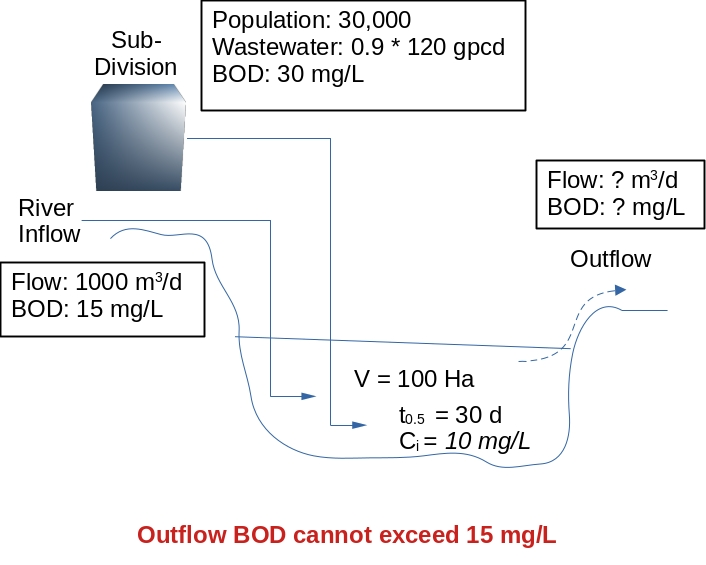

<h4>  Mathematical Equations

Mass Balance for the Water:

$
Q_o = Q_r + Q_sd  
$

Mass Balnce for BOD

$
\frac{dBOD}{dt} = \left[ \frac{Q_r \times BOD_r}{V} + \frac{Q_{sd} \times BOD_{sd}}{V} \right] - \left( \frac{Q \times BOD}{V} - k \times BOD \right)
$

<h4> Computer Program </h4>

<p style="padding: 10px; border: 2px solid red; background: yellow; text-align: center"> Here we shall make use of the <strong>solve_ivp</strong> function in <strong> scipy.integrate </strong> module.  You can find the details of the function <a href:"https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html"> by clicking here </a> </p>

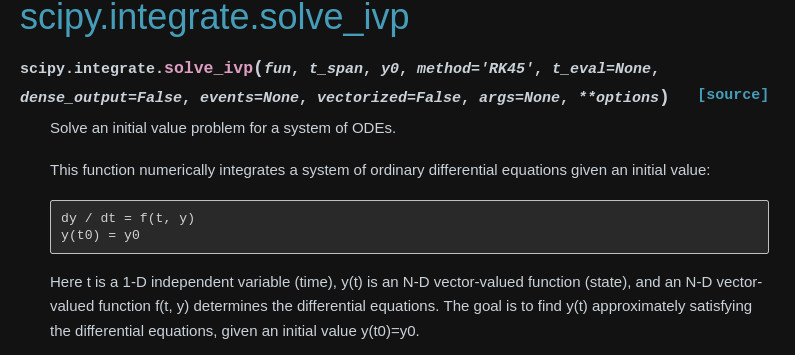

In [18]:
# Import library and function to solve the differential equation
from scipy.integrate import solve_ivp  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
import numpy as np # for calculations
from matplotlib import pyplot as plt  # for plotting

In [19]:
# Input Data  Units - Time - Days, Length - Meters and Mass in g
Qr = 1000 # m^3/d
BODr = 15 # g/m^3
BODsd = 300 # g/m^3
pop = 30000
wateruse = 120 # gpcd
eff = 0.9 # water to wastewater conversion factor assumed 0.9
A = 100 #Ha
d = 10 #m
t05 = 30 # half-life in days
BODi = 10 # initial condition

In [20]:
# Make preliminary calculations to make units consistent
CFHM = 10000
V = A * d * CFHM # calculate volume of the lake and convert Ha to sq. M
G2M3 = 0.0037854118  # Conversion factor for Gallons to m^3
Qsd = pop * eff * wateruse * G2M3 # Water inflow from sub-division
k = 0.693/t05  # convert half-life to 

In [21]:
# Calculate Outflow rate (Assume total Inflow = Outflow)
Qo = Qr + Qsd
print(Qo)

13264.734232


In [22]:
# Write function for the differential Equation
def dboddt(t,BOD,Qr,Qsd,BODr,BODsd,V,k):
    Qo = Qr + Qsd  # outflow is equal to sum of inflow from river and subdivision.
    rhs = (Qr*BODr + Qsd * BODsd)/V - (Qo/V +k)*BOD # RHS of the BOD mass-balance
    return(rhs)

In [23]:
# Define the time-span of the simulation and times when 
maxt = 365
delt = 1/1 # time-step for obtaining results every hour
tspan = (0.0,maxt+delt) # run for a simulation period of 30 days
teval = np.arange(0,maxt+delt,delt) # Get results for 1 year 

In [24]:
# solve the ODE
res = solve_ivp(fun = dboddt, t_span = tspan, y0 = (BODi,), method='RK45', t_eval=teval,args=(Qr,Qsd,BODr,BODsd,V,k))
res

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 

In [26]:
# Get X and Y data in the same shape
rows = len(res.t)
timex = res.t.reshape(rows,1)
BODx = res.y.reshape(rows,1)

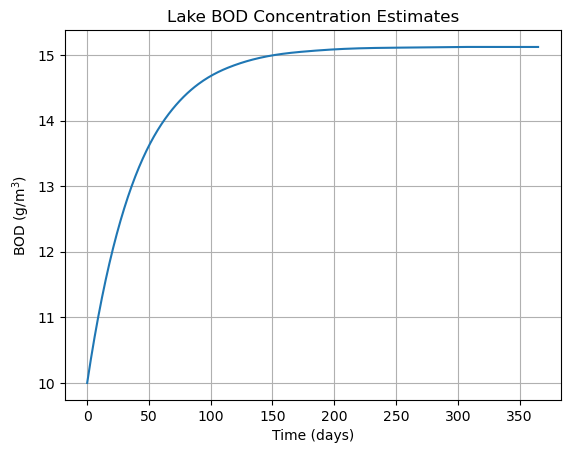

In [27]:
# Make Plots
plt.plot(timex,BODx)
plt.xlabel('Time (days)')
plt.ylabel(r'BOD (g/m$^3$)')
plt.title('Lake BOD Concentration Estimates')
plt.grid()
plt.show()

<h4>  Results <h4>

<font color='red'> The lake volume is insufficient to keep the BOD below 15 $g/m^3$.  The developer must increase the depth or the area of the lake. </font>  